In [13]:
import nltk
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


# Send an HTTP GET request to retrieve the content of Moby Dick from a website
response = requests.get('https://www.gutenberg.org/files/2701/2701-0.txt')
moby_dick_text = response.text





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average sentiment score is 0.003518344789271052
The overall text sentiment is negative


In [14]:
tokens = word_tokenize(moby_dick_text)
tokens = [token for token in tokens if not re.match(r"[,.;!?]|s''\d", token)]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if not token in stop_words]

In [15]:
# POS tagging
tagged = nltk.pos_tag(filtered_tokens)

# Count and display the 5 most common POS
pos_freq = FreqDist(tag for (word, tag) in tagged)
common_pos = pos_freq.most_common(5)
print(common_pos)

[('NN', 28396), ('JJ', 21134), ('NNP', 12842), ('NNS', 10179), ('RB', 8651)]


In [16]:
from collections import Counter
import string
pos_tag_mapping = {
    'NNS': 'n',  # Noun, plural
    'VBG': 'v',  # Verb, gerund or present participle
    'NN': 'n',   # Noun, singular or mass
    'VBD': 'v',  # Verb, past tense
    'VBN': 'v',  # Verb, past participle
    'JJ': 'a',   # Adjective
    'VBZ': 'v',  # Verb, 3rd person singular present
    'VBP': 'v',  # Verb, non-3rd person singular present
    'RB': 'r',   # Adverb
    'NNP': 'n',  # Proper noun, singular
    'VB': 'v',   # Verb, base form
    'IN': 'n',   # Preposition or subordinating conjunction
    'PRP': 'n',  # Personal pronoun
    'PRP$': 'n', # Possessive pronoun
    'JJR': 'a',  # Adjective, comparative
    'JJS': 'a',  # Adjective, superlative
    'CD': 'n',   # Cardinal number
    'MD': 'v',   # Modal
    'VBG': 'v',  # Verb, gerund or present participle
    'RBR': 'r',  # Adverb, comparative
    'RBS': 'r',  # Adverb, superlative
    'WP': 'n',   # Wh-pronoun
    'WRB': 'r',  # Wh-adverb
}

# Assuming you have already defined 'pos_tagged_tokens' list

# Extract the top 20 tokens
top_20_tokens = Counter(tagged).most_common(20)

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize the top 20 tokens and remove punctuation
lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag_mapping[pos]) for (token, pos), count in top_20_tokens if pos in pos_tag_mapping and not all(char in string.punctuation for char in token)]

# Print the lemmatized tokens
print(top_20_tokens)
print(lemmatized_tokens)

[(('I', 'PRP'), 1836), (('one', 'CD'), 856), (('But', 'CC'), 675), (('The', 'DT'), 639), (('â\x80\x9d', 'NNP'), 571), (('like', 'IN'), 528), (('upon', 'IN'), 499), (('old', 'JJ'), 429), (('would', 'MD'), 417), (('Ahab', 'NNP'), 416), (('man', 'NN'), 413), (('whale', 'NN'), 340), (('And', 'CC'), 334), (('sea', 'NN'), 326), (('time', 'NN'), 313), (('though', 'IN'), 312), (('whale', 'JJ'), 309), (('said', 'VBD'), 297), (('still', 'RB'), 295), (('must', 'MD'), 291)]
['I', 'one', 'â\x80\x9d', 'like', 'upon', 'old', 'would', 'Ahab', 'man', 'whale', 'sea', 'time', 'though', 'whale', 'say', 'still', 'must']


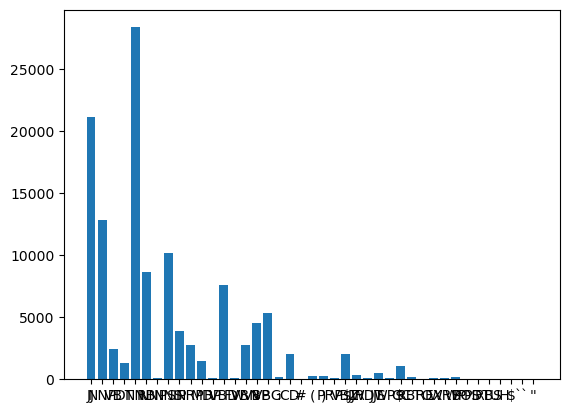

In [18]:
plt.bar(pos_freq.keys(), pos_freq.values())
plt.show()


In [17]:
# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(token)['compound'] for token in filtered_tokens]
average_sentiment = sum(sentiments) / len(sentiments)

print("Average sentiment score is", average_sentiment)

if average_sentiment > 0.05:
    print("The overall text sentiment is positive")
else:
    print("The overall text sentiment is negative")

Average sentiment score is 0.004493685539365351
The overall text sentiment is negative
